<a href="https://colab.research.google.com/github/rokeya160210/Assignment1/blob/main/Predicting_Car_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [118]:
import pandas as pd
url = 'https://raw.githubusercontent.com/rashakil-ds/Public-Datasets/main/automobile.csv'
df = pd.read_csv(url)

In [119]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [120]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

# Goal & Steps:

1. Predicting Car Prices:
   - Task: Build a regression model to predict the price (y=price) of cars based on other features in the dataset. This could involve preprocessing the data, selecting relevant features, and implementing `linear regression` and `KNN` algorithm.

2. Feature Engineering:
   - Task: Challenge students to come up with creative ways to engineer new features from the existing ones. For example, they could create a new feature representing the ratio of horsepower to curb weight.

3. Exploratory Data Analysis (EDA):
   - Task: Have students perform in-depth exploratory data analysis to understand the relationships between different features. Visualization tools can be used to communicate their findings effectively.

4. Handling Missing Data:
   - Task: Teach students how to handle missing data in a dataset. They can explore different strategies such as imputation or removal of missing values.

5. Training:
   - Task: Use relavant ML Models

6. Model evaluation:
- Evaluate models and Summarizing their findings. This should include a clear explanation of the model's performance and any insights gained from the analysis.

In [121]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score
import matplotlib.pyplot as plt

preprocessing the data

In [122]:
df.isnull().sum()

,0
symboling,0
normalized-losses,37
make,0
fuel-type,0
aspiration,0
num-of-doors,2
body-style,0
drive-wheels,0
engine-location,0
wheel-base,0


<Axes: xlabel='symboling', ylabel='Count'>

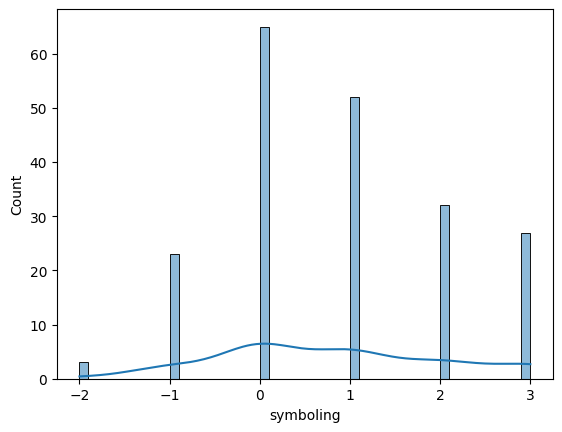

In [123]:
import seaborn as sns
sns.histplot(df.symboling, kde=True,bins=50)

<Axes: xlabel='normalized-losses', ylabel='Count'>

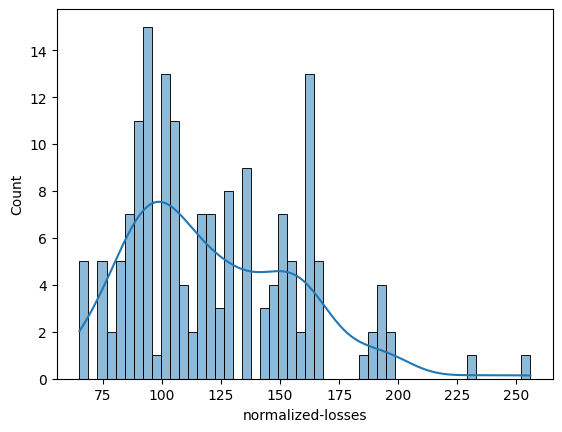

In [124]:
sns.histplot(df['normalized-losses'], kde=True,bins=50)

<Axes: xlabel='num-of-doors', ylabel='Count'>

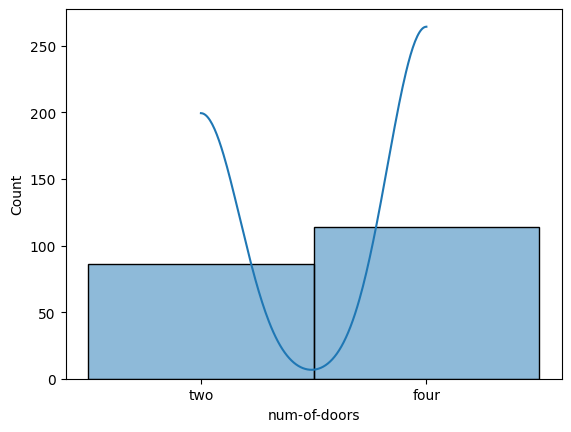

In [125]:
sns.histplot(df['num-of-doors'], kde=True,bins=50)

In [126]:
df['normalized-losses'].value_counts().sum()

np.int64(165)

In [127]:
df['num-of-doors'].value_counts().sum()

np.int64(200)

In [128]:
df['normalized-losses'].isnull().sum()

np.int64(37)

In [129]:
df['num-of-doors'].value_counts().sum()

np.int64(200)

Encode the data set

In [130]:
from sklearn.preprocessing import LabelEncoder

In [131]:
label = LabelEncoder()

In [132]:
from pandas.core.dtypes.common import is_numeric_dtype

In [133]:
for column in df.columns:
    if is_numeric_dtype(df[column]):
        continue
    else:
        df[column] = label.fit_transform(df[column])

In [134]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,0,1,0,1,0,2,0,88.6,...,130,5,23,4,9.0,5,10,21,27,13495
1,3,NaN,0,1,0,1,0,2,0,88.6,...,130,5,23,4,9.0,5,10,21,27,16500
2,1,NaN,0,1,0,1,2,2,0,94.5,...,152,5,1,27,9.0,20,10,19,26,16500
3,2,164.0,1,1,0,0,3,1,0,99.8,...,109,5,13,24,10.0,2,16,24,30,13950
4,2,164.0,1,1,0,0,3,0,0,99.4,...,136,5,13,24,8.0,8,16,18,22,17450


Measure of Central Tendency

In [135]:
df['normalized-losses'].mean()

np.float64(121.83636363636364)

In [136]:
df['normalized-losses'].median()

115.0

In [137]:
mean_value = df['normalized-losses'].mean()
df['normalized-losses'].fillna(mean_value, inplace=True)

/tmp/ipython-input-137-4188861433.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['normalized-losses'].fillna(mean_value, inplace=True)


In [138]:
df['normalized-losses'].isnull().sum()

np.int64(0)

<Axes: xlabel='normalized-losses', ylabel='Count'>

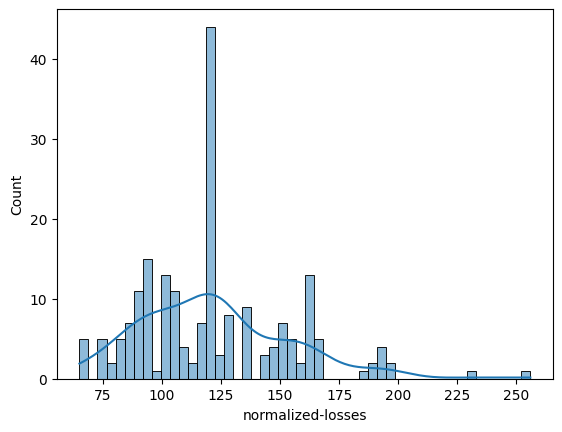

In [139]:
sns.histplot(df['normalized-losses'], kde=True,bins=50)

In [140]:
df['num-of-doors'].mean()
mean_value2 = df['num-of-doors'].mean()
df['num-of-doors'].fillna(mean_value2, inplace=True)

/tmp/ipython-input-140-3705165816.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['num-of-doors'].fillna(mean_value2, inplace=True)


In [141]:
df['num-of-doors'].isnull().sum()

np.int64(0)

In [142]:
x = df.drop('price', axis=1)
y = df['price']

In [143]:
x

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,3,121.836364,0,1,0,1,0,2,0,88.6,...,2,130,5,23,4,9.0,5,10,21,27
1,3,121.836364,0,1,0,1,0,2,0,88.6,...,2,130,5,23,4,9.0,5,10,21,27
2,1,121.836364,0,1,0,1,2,2,0,94.5,...,3,152,5,1,27,9.0,20,10,19,26
3,2,164.000000,1,1,0,0,3,1,0,99.8,...,2,109,5,13,24,10.0,2,16,24,30
4,2,164.000000,1,1,0,0,3,0,0,99.4,...,1,136,5,13,24,8.0,8,16,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,-1,95.000000,21,1,1,0,3,2,0,109.1,...,2,141,5,35,15,8.7,23,14,19,25
198,-1,95.000000,21,1,0,0,3,2,0,109.1,...,3,173,5,26,7,8.8,13,16,18,23
199,-1,95.000000,21,0,1,0,3,2,0,109.1,...,3,145,3,6,24,23.0,3,8,26,27
200,-1,95.000000,21,1,1,0,3,2,0,109.1,...,2,141,5,35,15,9.5,7,15,19,25


In [144]:
y

,price
0,13495
1,16500
2,16500
3,13950
4,17450
...,...
197,19045
198,21485
199,22470
200,22625


selecting relevant features

In [145]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.30, random_state=0)

Implementing linear regression and KNN algorithm

In [146]:
model = LinearRegression()

In [147]:
model.fit(xtrain, ytrain)
y_pred = model.predict(xtest)
y_pred

array([ 8683.61485764,  7658.22165908, 20585.98623448, 19715.61738305,
        8358.01238205,  9275.17074022, 15679.09521451,  6441.23329   ,
       17480.34514865,  6317.38019289, 12331.52884892, 20773.96206445,
        7004.61557421,  6310.55064641, 14459.43229125, 21092.03697879,
        6699.95971239, 18165.35132612, 10185.86475946,  5759.42230957,
       17120.99989634, 10787.86159781, 29965.33142596,  6619.51808861,
       13096.58182579, 19823.43211701,  8716.35408954,  2844.37415392,
       14545.69682065, 29567.60242305, 30117.48426422, 10098.4602893 ,
        5841.23895294, 20744.05883074,  9972.53316627, 17055.68086464,
       15086.42709824, 14271.8472099 ,  8418.22992861, 17915.88619048,
        6962.70950074, 26647.26629636,  8903.8074965 , 18080.90911999,
        6965.92498897, 13605.97369992, 22109.66353699,  5931.86514185,
        5097.40963929,  8471.27990143, 36999.5108158 , 19823.43211701,
        7008.93420717,  8886.96510182,  7656.30090206,  5994.5795498 ,
      

In [148]:
mse_lr = mean_squared_error(ytest, y_pred)
print('MSE:', mse_lr)

MSE: 20172196.73235486


In [149]:
train_r2_lr = model.score(xtrain, ytrain)# train data -> training accuracy

In [150]:
test_r2_lr = model.score(xtest, ytest)# test data -> testing accuracy

In [151]:
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(xtrain, ytrain)

KNeighborsRegressor()

In [152]:
# Training accuracy (R²)
train_r2_knn = knn_model.score(xtrain, ytrain)

In [153]:
# Testing accuracy (R²)
test_r2_knn = knn_model.score(xtest, ytest)

In [154]:
# Mean Squared Error (MSE) on Test
y_pred_knn = knn_model.predict(xtest)
mse_knn = mean_squared_error(ytest, y_pred_knn)

In [155]:
print(f"KNN Train R²: {train_r2_knn:.4f}")
print(f"KNN Test R²: {test_r2_knn:.4f}")
print(f"KNN Test MSE: {mse_knn:.4f}")

KNN Train R²: 0.8450
KNN Test R²: 0.6230
KNN Test MSE: 32506030.9541


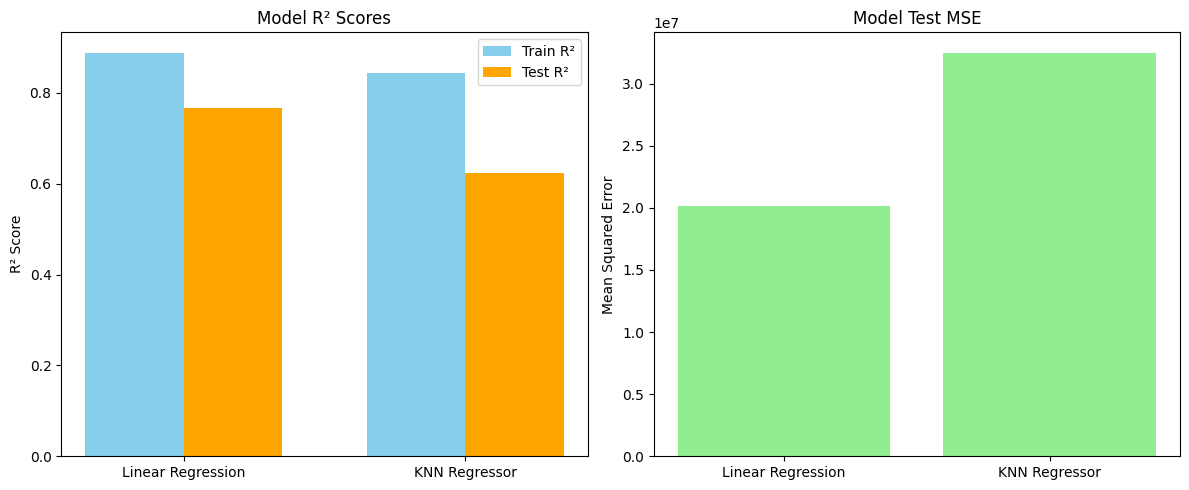

In [156]:
import matplotlib.pyplot as plt
import numpy as np

# R² Scores
models = ['Linear Regression', 'KNN Regressor']
train_scores = [train_r2_lr, train_r2_knn]
test_scores = [test_r2_lr, test_r2_knn]

# MSE Scores
test_mse = [mse_lr, mse_knn]

# Plotting R² Scores
x = np.arange(len(models))  # X-axis positions
width = 0.35

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# R² Bar Plot
axs[0].bar(x - width/2, train_scores, width, label='Train R²', color='skyblue')
axs[0].bar(x + width/2, test_scores, width, label='Test R²', color='orange')
axs[0].set_ylabel('R² Score')
axs[0].set_title('Model R² Scores')
axs[0].set_xticks(x)
axs[0].set_xticklabels(models)
axs[0].legend()

# MSE Bar Plot
axs[1].bar(models, test_mse, color='lightgreen')
axs[1].set_ylabel('Mean Squared Error')
axs[1].set_title('Model Test MSE')

plt.tight_layout()
plt.show()
